tgb - 6/3/2021 - Sea surface temperature plots and snapshots of the aquaplanet/real-geography/Janni's surface temperature and lower-tropospheric subgrid heating 

# Imports

In [1]:
import xarray as xr
import numpy as np
import math

import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as imag
from mpl_toolkits.basemap import Basemap
bm = Basemap()

import pickle

TRAINDIR = '/local/Tom.Beucler/SPCAM_PHYS/'
DATADIR = '/project/meteo/w2w/A6/S.Rasp/SP-CAM/fluxbypass_aqua/'
PREFIX = '8col009_01_'

/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [2]:
fz = 15
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw

# Load Data

## Aquaplanet

In [3]:
path_folder = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/'

In [4]:
pathAQ_m4K = path_folder + 'sp8fbp_minus4k/sp8fbp_minus4k.cam2.h2.00'
pathAQ_0K = path_folder + 'fluxbypass_aqua/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.00'
pathAQ_p4K = path_folder + 'sp8fbp_4k/sp8fbp_4k.cam2.h2.00'

In [5]:
STaqua_m4K = xr.open_dataset(pathAQ_m4K+'00-03-01-00000.nc')

In [6]:
STaqua_0K = xr.open_dataset(pathAQ_0K+'00-03-01-00000.nc')

In [7]:
STaqua_p4K = xr.open_dataset(pathAQ_p4K+'00-03-01-00000.nc')

In [8]:
print(STaqua_m4K.lev[18].values,STaqua_m4K.lev[17].values,STaqua_m4K.lev[-1].values)

524.6871747076511 445.992574095726 992.556095123291


## Real-geography

### Load dataset

In [9]:
path_folRG = '/DFS-L/DATA/pritchard/liranp/'

In [10]:
path_m4K = path_folRG + 'SST_4Km_Neuralnet_SPCAM_all_small_216/atm/hist/SST_4Km_Neuralnet_SPCAM_all_small_216.cam.h1.2009-'
path_0K = path_folRG + 'SST_0001Kp_Neuralnet_SPCAM_all_216/atm/hist/SST_0001Kp_Neuralnet_SPCAM_all_216.cam.h1.2013-'
path_p4K = path_folRG + 'SST_4Kp_Neuralnet_SPCAM_all_v2_216/atm/hist/SST_4Kp_Neuralnet_SPCAM_all_v2_216.cam.h1.2009-'

In [11]:
ST_m4K = xr.open_mfdataset(path_m4K+'*01-08-*.nc',decode_cf=False)

In [12]:
ST_0K = xr.open_mfdataset(path_0K+'*01-08-*.nc',decode_cf=False)

In [13]:
ST_p4K = xr.open_mfdataset(path_p4K+'*01-08-*.nc',decode_cf=False)

In [14]:
st_m4K = ST_m4K.NN2L_TBOT.mean(dim='time')
st_m4K = st_m4K.values

In [15]:
st_0K = ST_0K.NN2L_TBOT.mean(dim='time')
st_0K = st_0K.values

In [16]:
st_p4K = ST_p4K.NN2L_TBOT.mean(dim='time')
st_p4K = st_p4K.values

In [17]:
# print('-4K')
# ssgs_m4K = ST_m4K.PTTEND[:,-1,:,:].mean(dim='time')
# ssgs_m4K = ssgs_m4K.values

# print('0K')
# ssgs_0K = ST_0K.PTTEND[:,-1,:,:].mean(dim='time')
# ssgs_0K = ssgs_0K.values

# print('+4K')
# ssgs_p4K = ST_p4K.PTTEND[:,-1,:,:].mean(dim='time')
# ssgs_p4K = ssgs_p4K.values

### Save/Load means for future use

In [24]:
pathPKL = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/PKL_DATA/'

In [25]:
save_name = '2021_06_03_ST_means.pkl'

In [26]:
# hf = open(pathPKL+save_name,'wb')

# F_data = {'st_0K':st_0K,'st_m4K':st_m4K,'st_p4K':st_p4K,\
#          #'ssgs_0K':ssgs_0K,'ssgs_m4K':ssgs_m4K,'ssgs_p4K':ssgs_p4K
#          }

# pickle.dump(F_data,hf)
# hf.close()

In [27]:
hf = open(pathPKL+save_name,'rb')

ST_mean = pickle.load(hf)
hf.close()

## Janni's Hypohydrostatic simulations

In [28]:
path_HH = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/Janni_data/'

In [29]:
coor_HH = pickle.load(open(path_HH+'coordinates.pkl','rb'))

In [30]:
inpoup_HH = pickle.load(open(path_HH+'temperature_related_and_output_dict2.pkl','rb'))

In [31]:
inpoup_HH['T_xy'].keys()

dict_keys(['qobs', 'qobs4K'])

In [32]:
inpoup_HH['Tout_482'].keys()

dict_keys(['qobs', 'qobs4K'])

# Surface temperature plots

## Aquaplanet

Adapted from [https://nbviewer.jupyter.org/github/gmooers96/Real_Geography_Manuscript/blob/master/Final_Paper_Figures.ipynb]

In [21]:
vmin0 = 270
vmax0 = 310

In [22]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 0.98, 'Aquaplanet (SPCAM3)')

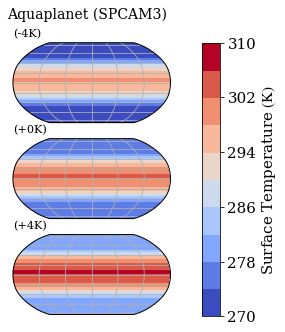

In [23]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(5,5))

for iax in range(3):
    if iax==0: data = STaqua_m4K; tit = '(-4K)'
    elif iax==1: data = STaqua_0K; tit = '(+0K)'
    elif iax==2: data = STaqua_p4K; tit = '(+4K)'

    imag = ax[iax].pcolormesh(data.lon, data.lat, data.TS.mean(dim='time'),
                                cmap=cmap, norm=norm, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[iax].gridlines()
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
        fig.colorbar(imag, label="Surface Temperature "+r'$\left(\mathrm{K}\right)$', cax=cbar_ax)

fig.suptitle("Aquaplanet (SPCAM3)", fontsize=14)

## Real-geography

In [24]:
vmin0 = 270
vmax0 = 310

In [25]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 0.98, 'Earth-like (SPCAM5)')

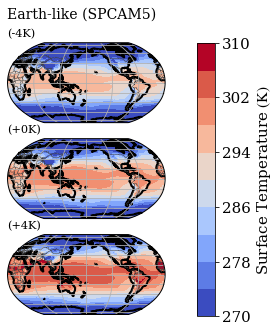

In [26]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(5,5))

for iax in range(3):
    if iax==0: data = ST_m4K; tit = '(-4K)'; toplot = st_m4K;
    elif iax==1: data = ST_0K; tit = '(+0K)'; toplot = st_0K;
    elif iax==2: data = ST_p4K; tit = '(+4K)'; toplot = st_p4K;

    imag = ax[iax].pcolormesh(data.lon, data.lat, toplot,
                                cmap=cmap, norm=norm, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[iax].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[iax].gridlines()
    ax[iax].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
        fig.colorbar(imag, label="Surface Temperature "+r'$\left(\mathrm{K}\right)$', cax=cbar_ax)

fig.suptitle("Earth-like (SPCAM5)", fontsize=14)

# Subgrid heating plots

## Aquaplanet

In [27]:
STaqua_m4K.TPHYSTND

<xarray.DataArray 'TPHYSTND' (time: 48, lev: 30, lat: 64, lon: 128)>
[11796480 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) object 0000-03-01 00:00:00 ... 0000-03-01 23:29:59
Attributes:
    units:      K/s
    long_name:  T physics tendency

Adapted from [https://nbviewer.jupyter.org/github/gmooers96/Real_Geography_Manuscript/blob/master/Final_Paper_Figures.ipynb]

In [28]:
it = 0

In [41]:
vmin0 = -15
vmax0 = 15

In [42]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 101)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 0.98, 'Aquaplanet (SPCAM3)')

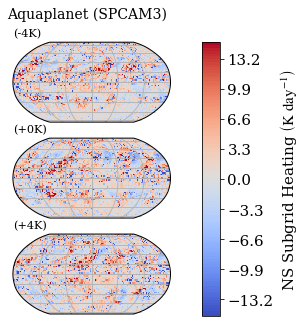

In [43]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(5,5))

for iax in range(3):
    if iax==0: data = STaqua_m4K; tit = '(-4K)'
    elif iax==1: data = STaqua_0K; tit = '(+0K)'
    elif iax==2: data = STaqua_p4K; tit = '(+4K)'

    imag = ax[iax].pcolormesh(data.lon, data.lat, 24*3600*data.TPHYSTND[it,-1,:,:],
                              cmap=cmap,norm=norm,
                                transform=ccrs.PlateCarree())
    ax[iax].gridlines()
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
        fig.colorbar(imag, label="NS Subgrid Heating "+r'$\left(\mathrm{K\ day^{-1}}\right)$', cax=cbar_ax)

fig.suptitle("Aquaplanet (SPCAM3)", fontsize=14)

## Real-geography

In [70]:
it = 100

In [71]:
vmin0 = -15
vmax0 = 15

In [72]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 101)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 0.98, 'Earth-like (SPCAM5)')

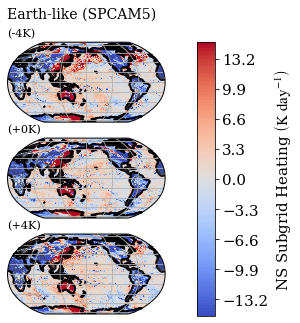

In [73]:
fig, ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(5,5))

for iax in range(3):
    if iax==0: data = ST_m4K; tit = '(-4K)'; toplot = 24*3600*ST_m4K.PTTEND[it,-1,:,:];
    elif iax==1: data = ST_0K; tit = '(+0K)'; toplot = 24*3600*ST_0K.PTTEND[it,-1,:,:];
    elif iax==2: data = ST_p4K; tit = '(+4K)'; toplot = 24*3600*ST_p4K.PTTEND[it,-1,:,:];

    imag = ax[iax].pcolormesh(data.lon, data.lat, toplot,
                                cmap=cmap, norm=norm, 
                                transform=ccrs.PlateCarree(),vmin=vmin0,vmax=vmax0)
    ax[iax].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[iax].gridlines()
    ax[iax].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    ax[iax].set_title(tit,loc='left',fontsize=3*fz/4)

    # Colorbar
    if iax==0:
        cbar_ax = fig.add_axes([0.82, 0.12, 0.05, 0.76])
        fig.colorbar(imag, label="NS Subgrid Heating "+r'$\left(\mathrm{K\ day^{-1}}\right)$', cax=cbar_ax)

fig.suptitle("Earth-like (SPCAM5)", fontsize=14)

# Group all plots together

## Create colorbars

In [33]:
vmin0_SST = 270
vmax0_SST = 310

In [34]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap_SST = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0_SST, vmax0_SST, 11)
norm_SST = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [35]:
vmin0_SGS = -15
vmax0_SGS = 15

In [36]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap_SGS = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0_SGS, vmax0_SGS, 101)
norm_SGS = mpl.colors.BoundaryNorm(bounds, cmap.N)

## Plot all maps together

In [37]:
# CBAR_position = [0.92, 0.525, 0.03, 0.35]
# CBAR2_position = [0.92, 0.135, 0.03, 0.35]
CBAR_position = [0.05, 0.525, 0.03, 0.35]
CBAR2_position = [0.05, 0.135, 0.03, 0.35]
it = 13; # Time index to select subgrid heating
ip = 18; # Pressure index to select 500-hPa level
Y0 = 1.5; # Position of the text above the subplots
X1 = -0.1; # Position of (a) and (b)
Y1 = 1.25; # Position of (a) and (b)

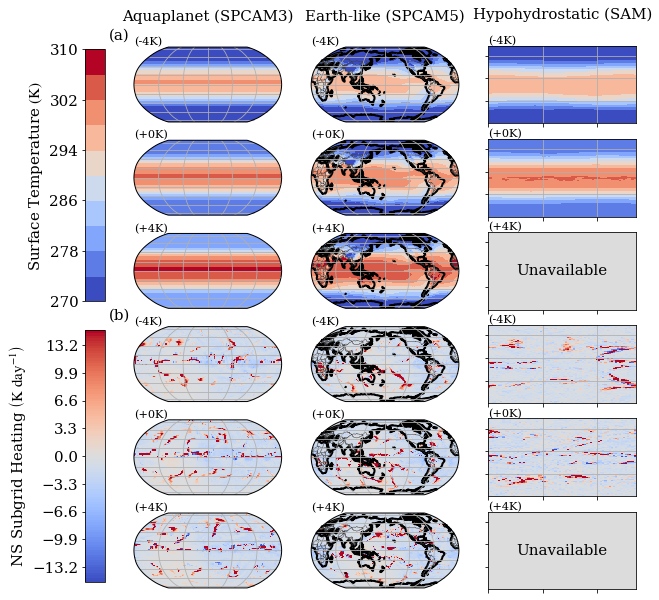

In [41]:
fig, ax = plt.subplots(6,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(9,10))

for isub in range(6): # Loop over 6 subplots
    
    icol = isub-3*math.floor(isub/3) # Determine location of subplot (out of 6)
    if math.floor(isub/3)==0: cmap0 = cmap_SST; norm0 = norm_SST; vmin0 = vmin0_SST; vmax0 = vmax0_SST;
    else: cmap0 = cmap_SGS; norm0 = norm_SGS; vmin0 = vmin0_SGS; vmax0 = vmax0_SGS;
    
    for iax in range(3): # In each subplot, loop over 3 climates (from top to bottom)
        
        if iax==0: 
            if isub%3==0: HH = False; data = STaqua_m4K;
            elif isub%3==1: data = ST_m4K;
            elif isub%3==2: HH = True; Avail=True; dataset = 'qobs';
            if isub==1: toplot = ST_mean['st_m4K'];
            tit = '(-4K)'
        elif iax==1: 
            if isub%3==0: HH = False; data = STaqua_0K;
            elif isub%3==1: data = ST_0K; 
            elif isub%3==2: HH = True; Avail=True; dataset = 'qobs4K';
                #data = inpoup_HH['T_xy']; data['lon'] = coor_HH['x'];
            if isub==1: toplot = ST_mean['st_0K'];
            tit = '(+0K)'
        elif iax==2: 
            if isub%3==0: HH = False; data = STaqua_p4K;
            elif isub%3==1: data = ST_p4K; 
            elif isub%3==2: HH=True; Avail=False;
            if isub==1: toplot = ST_mean['st_p4K'];
            tit = '(+4K)'
        
        if isub==0: toplot = data.TS.mean(dim='time')
        elif isub==2: toplot = 'T_xy'
        elif isub==3: toplot = 24*3600*data.TPHYSTND[it,ip,:,:]
        elif isub==4: toplot = 24*3600*data.PTTEND[it,ip,:,:]
        elif isub==5: toplot = 'Tout_482'

        irow = iax+3*math.floor(isub/3) # To make 6 panels
        
        if HH:
            ax[irow][icol].remove()
            ax[irow][icol] = fig.add_subplot(6,3,3*irow+icol+1)
            if Avail:
                imag = ax[irow][icol].pcolormesh(coor_HH['x'],coor_HH['y'],
                                                 inpoup_HH[toplot][dataset],
                                                 cmap=cmap0,norm=norm0,
                                                 vmin=vmin0,vmax=vmax0)
                ax[irow][icol].grid()
            else:
                imag = ax[irow][icol].pcolormesh(coor_HH['x'],coor_HH['y'],
                                                 0*inpoup_HH['T_xy']['qobs'],
                                                 cmap=cmap_SGS,norm=norm_SGS)
            ax[irow][icol].xaxis.set_ticklabels([])
            ax[irow][icol].yaxis.set_ticklabels([])
        else:
            imag = ax[irow][icol].pcolormesh(data.lon, data.lat, 
                                             toplot,cmap=cmap0, norm=norm0,
                                             transform=ccrs.PlateCarree(),
                                             vmin=vmin0,vmax=vmax0)
            ax[irow][icol].gridlines()
        ax[irow][icol].set_title(tit,loc='left',fontsize=3*fz/4,pad=-0.1)
        if icol%3==1:
                ax[irow][icol].coastlines(linewidth=2.0,edgecolor='0.25')
                ax[irow][icol].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
        
        # Colorbar
        if isub==0 and iax==0:
            cbar_ax = fig.add_axes(CBAR_position)
            CBAR = fig.colorbar(imag, label="Surface Temperature "+r'$\left(\mathrm{K}\right)$', cax=cbar_ax)
            cbar_ax.yaxis.set_ticks_position('left')
            cbar_ax.yaxis.set_label_position('left')
        elif isub==3 and iax==0:
            cbar2_ax = fig.add_axes(CBAR2_position)
            fig.colorbar(imag, label="NS Subgrid Heating "+r'$\left(\mathrm{K\ day^{-1}}\right)$', cax=cbar2_ax)
            cbar2_ax.yaxis.set_ticks_position('left')
            cbar2_ax.yaxis.set_label_position('left')
        
        # Title of each column
        if iax==0:
            if isub==0: ax[0][isub].text(0.5,Y0,"Aquaplanet (SPCAM3)",fontsize=fz,
                                                       va='top',ha = 'center',
                                                       transform = ax[0][isub].transAxes)
            elif isub==1: ax[0][isub].text(0.5,Y0,"Earth-like (SPCAM5)",fontsize=fz,
                                                       va='top',ha = 'center',
                                                       transform = ax[0][isub].transAxes)
            elif isub==2: ax[0][isub].text(0.5,Y0,"Hypohydrostatic (SAM)",fontsize=fz,
                                                       va='top',ha = 'center',
                                                       transform = ax[0][isub].transAxes)
        # (a) and (b) subplots
        if isub==0:
            if iax==0: ax[0][isub].text(X1,Y1,'(a)',fontsize=fz,va='top',ha='center',
                                       transform = ax[0][isub].transAxes)
        elif isub==3: 
            if iax==0: ax[irow][icol].text(X1,Y1,'(b)',fontsize=fz,va='top',ha='center',
                                       transform = ax[irow][icol].transAxes)
        
        # SAM (-4K) unavailable for now
        if isub==2 or isub==5:
            if iax==2: ax[irow][icol].text(0.5,0.5,'Unavailable',fontsize=fz,va='center',ha='center',
                                       transform = ax[irow][icol].transAxes)          